In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
df = pd.read_csv('travel insurance.csv')

In [3]:
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


# Lets explore the data - EDA 

Lets create a copy of our dateframe

In [4]:
df1 = df.copy()

In [5]:
#Check for any missing values 
df1.isnull().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  45107
Age                         0
dtype: int64

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency Type           63326 non-null  object 
 2   Distribution Channel  63326 non-null  object 
 3   Product Name          63326 non-null  object 
 4   Claim                 63326 non-null  object 
 5   Duration              63326 non-null  int64  
 6   Destination           63326 non-null  object 
 7   Net Sales             63326 non-null  float64
 8   Commision (in value)  63326 non-null  float64
 9   Gender                18219 non-null  object 
 10  Age                   63326 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


In [7]:
df1.describe(include='all')

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
count,63326,63326,63326,63326,63326,63326.000000,63326,63326.000000,63326.000000,18219,63326.000000
unique,16,2,2,26,2,NaN,149,NaN,NaN,2,NaN
top,EPX,Travel Agency,Online,Cancellation Plan,No,NaN,SINGAPORE,NaN,NaN,M,NaN
freq,35119,45869,62219,18630,62399,NaN,13255,NaN,NaN,9347,NaN
mean,NaN,NaN,NaN,NaN,NaN,49.317074,NaN,40.702018,9.809992,NaN,39.969981
std,NaN,NaN,NaN,NaN,NaN,101.791566,NaN,48.845637,19.804388,NaN,14.017010
min,NaN,NaN,NaN,NaN,NaN,-2.000000,NaN,-389.000000,0.000000,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,18.000000,0.000000,NaN,35.000000
50%,NaN,NaN,NaN,NaN,NaN,22.000000,NaN,26.530000,0.000000,NaN,36.000000
75%,NaN,NaN,NaN,NaN,NaN,53.000000,NaN,48.000000,11.550000,NaN,43.000000


There is a lot we can already see just with the descriptive staticstics on the dataset:
 - **16** Agency types with EPX appearing most frequently 
 - **26** Product types with Cancellation plan being the most frequent
 - The average duration is **~50** (we can assume duration is in hours). We also have a negative value in duration which we can look at later
 - The most common place to travel to is **Singapore** 
 - Net sales also has a negative number which doesnt make complete sense but we can look into that later 
 - Gender has a lot of missing values 
 - The average age of the policy holder is **~40**

In [8]:
#Lets take a closer look at all the categorical variables 

In [9]:
cat = df1[['Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Destination', 'Gender']]

In [10]:
for col in cat.columns:
    if cat[col].nunique() < 30:
        print('Value counts for {}'.format(col))
        print(cat[col].value_counts())
        print('')
    else:
        print('Top 10 value counts for {}'.format(col))
        print(cat[col].value_counts()[:10])
        print('')

Value counts for Agency
EPX    35119
CWT     8580
C2B     8267
JZI     6329
SSI     1056
JWT      749
RAB      725
LWC      689
TST      528
KML      392
ART      331
CCR      194
CBH      101
TTW       98
CSR       86
ADM       82
Name: Agency, dtype: int64

Value counts for Agency Type
Travel Agency    45869
Airlines         17457
Name: Agency Type, dtype: int64

Value counts for Distribution Channel
Online     62219
Offline     1107
Name: Distribution Channel, dtype: int64

Value counts for Product Name
Cancellation Plan                       18630
2 way Comprehensive Plan                13158
Rental Vehicle Excess Insurance          8580
Basic Plan                               5469
Bronze Plan                              4049
1 way Comprehensive Plan                 3331
Value Plan                               2715
Silver Plan                              2249
Annual Silver Plan                       1423
Ticket Protector                         1056
Travel Cruise Protect       

Lets see if there is any association between the categorical variables - we will do this with pivot tables 

In [11]:
pd.pivot_table(data= df1, index='Distribution Channel', columns='Agency Type', values ='Duration', aggfunc='count')

Agency Type,Airlines,Travel Agency
Distribution Channel,,
Offline,20,1087
Online,17437,44782


We can see that online agencies are used more than offline - however, we also see that Airlines are barely used through an offline distribution method

In [12]:
pd.pivot_table(data= df1, index='Product Name', columns='Agency Type', values ='Duration', aggfunc='count')

Agency Type,Airlines,Travel Agency
Product Name,,
1 way Comprehensive Plan,NaN,3331.0
2 way Comprehensive Plan,NaN,13158.0
24 Protect,247.0,NaN
Annual Gold Plan,194.0,NaN
Annual Silver Plan,1423.0,NaN
Annual Travel Protect Gold,NaN,100.0
Annual Travel Protect Platinum,NaN,53.0
Annual Travel Protect Silver,NaN,86.0
Basic Plan,5469.0,NaN


We can also see that most products are only offered by 1 agency, apart from: 
   - Premier Plan 
   - Value Plan

<AxesSubplot:xlabel='Duration', ylabel='Destination'>

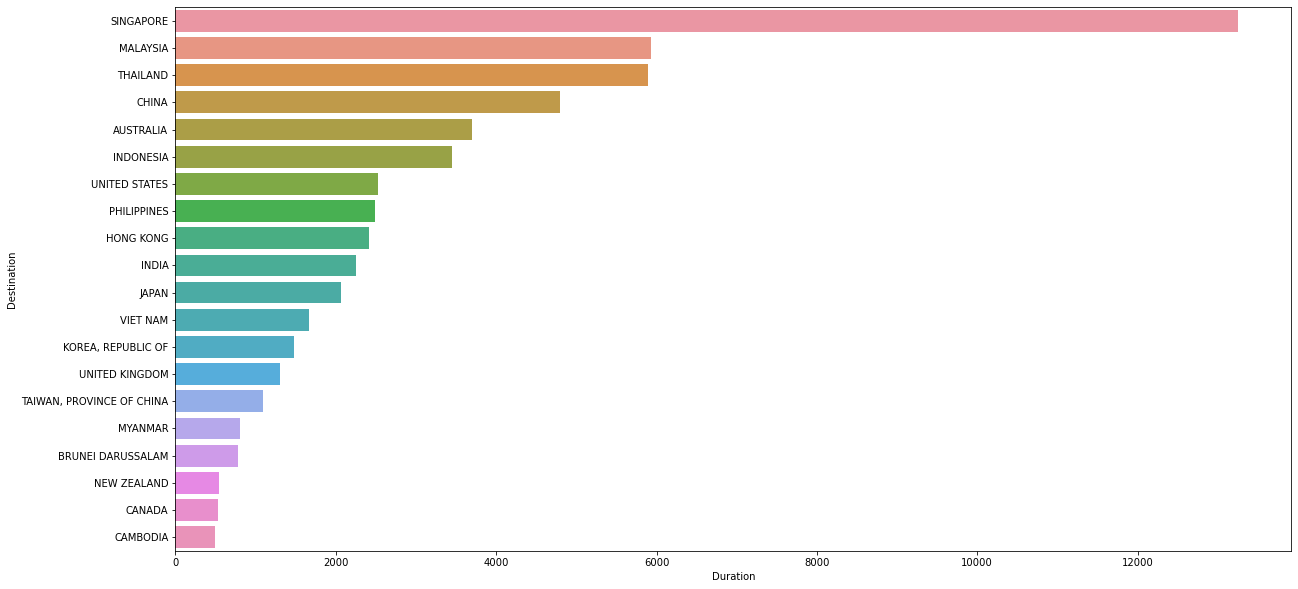

In [13]:
top_dest = pd.pivot_table(data= df1, index='Destination',values ='Duration', 
                          aggfunc='count').sort_values(by='Duration', ascending = False)[:20]
plt.figure(figsize=(20,10))
sns.barplot(data = top_dest, y=top_dest.index, x='Duration')

Interestingly, majority of the top 20 destinations to get travel insurance for are in Asia

In [14]:
#Lets look at the numerical variables

<Figure size 1080x1080 with 0 Axes>

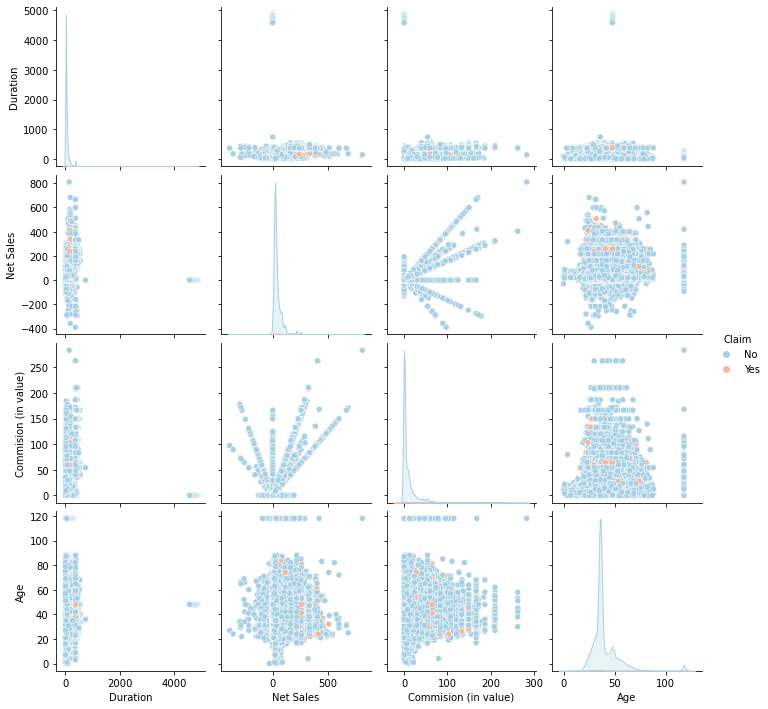

In [160]:
plt.figure(figsize=(15,15))
sns.pairplot(df1, hue='Claim', palette = 'RdBu_r')

<AxesSubplot:xlabel='Duration', ylabel='Count'>

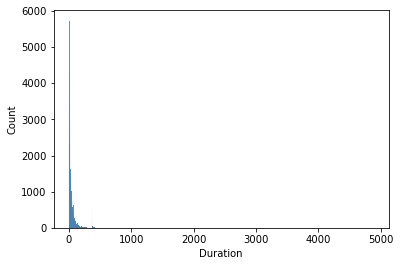

In [15]:
sns.histplot(data=df1, x='Duration')

In [16]:
df_num = df1[['Duration', 'Net Sales', 'Commision (in value)', 'Age']]

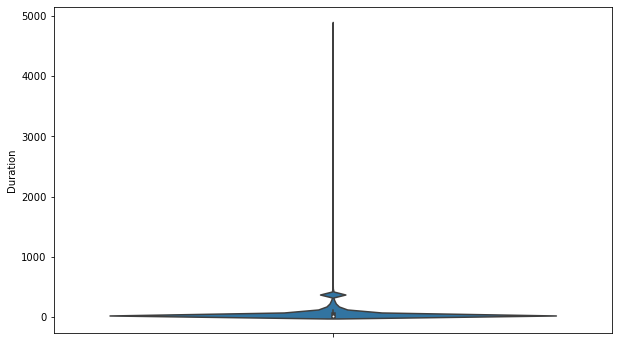

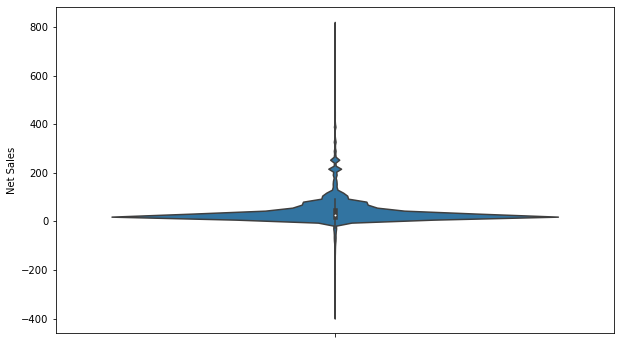

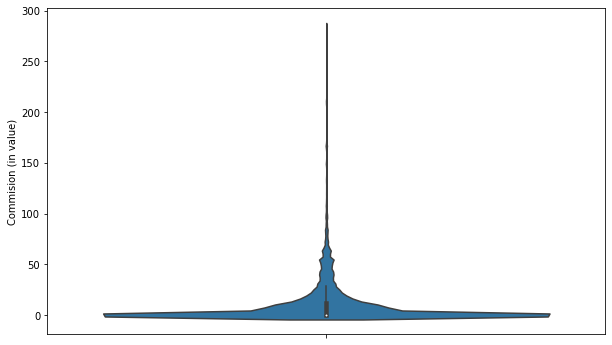

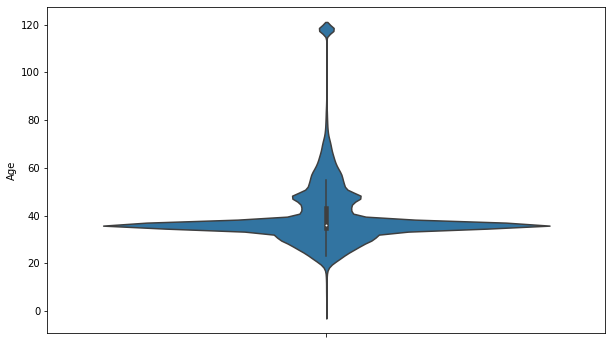

In [17]:
for col in df_num.columns:
    plt.figure(figsize=(10,6))
    sns.violinplot(data=df_num, y=col)
    plt.show()

Negative net sales would not make sense - therefore, we can change all the negative values to zero

In [18]:
df1 = df1.loc[df1['Net Sales']>=0]

In [19]:
df1.describe()

,Duration,Net Sales,Commision (in value),Age
count,62648.000000,62648.000000,62648.000000,62648.000000
mean,48.956918,41.802197,9.655309,39.963431
std,101.926299,47.634180,19.667866,14.001196
min,-2.000000,0.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,27.000000,0.000000,36.000000
75%,52.000000,49.000000,10.640000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


It looks like duration has some outliers, lets remove these

We can remove them using a log transformation or removing the outliers using the interquartile range, we will do the latter 

In [20]:
#Lets get the needed percentiles 
percentile_75 = np.percentile(df1['Duration'], 75)
percentile_25 = np.percentile(df1['Duration'], 25)

In [21]:
#Calculate the IQR 
IQR = percentile_75 - percentile_25

In [22]:
lower_bound = percentile_25 - (1.5* IQR)
upper_bound = percentile_75 + (1.5* IQR)

In [23]:
df1 = df1.loc[(df1['Duration']>lower_bound) & (df1['Duration']<upper_bound)]

In [24]:
df1.describe()

,Duration,Net Sales,Commision (in value),Age
count,57036.000000,57036.000000,57036.000000,57036.000000
mean,28.583754,34.837101,7.528371,39.966863
std,26.379245,28.595267,14.195847,14.138489
min,-2.000000,0.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,19.000000,26.000000,0.000000,36.000000
75%,41.000000,43.000000,9.570000,43.000000
max,116.000000,507.000000,184.140000,118.000000


<AxesSubplot:xlabel='Duration', ylabel='Count'>

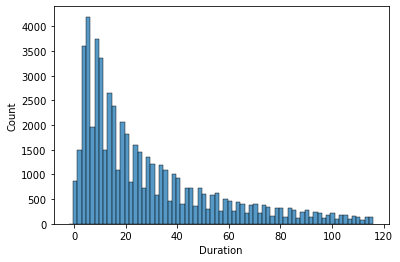

In [25]:
sns.histplot(data=df1, x='Duration')

<AxesSubplot:xlabel='Duration', ylabel='Distribution Channel'>

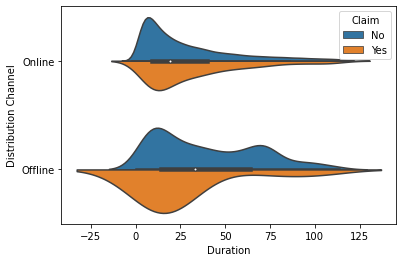

In [26]:
sns.violinplot(data=df1, x='Duration', y ='Distribution Channel',hue='Claim', split=True)

In [27]:
df1.Duration.describe()

count    57036.000000
mean        28.583754
std         26.379245
min         -2.000000
25%          9.000000
50%         19.000000
75%         41.000000
max        116.000000
Name: Duration, dtype: float64

We have a negative values for duration - lets remove this 

In [28]:
df1 = df1.loc[df1['Duration']>=0]

In [29]:
df1.Gender.value_counts(normalize=True)

M    0.522348
F    0.477652
Name: Gender, dtype: float64

The split between the genders is approximately even, and we know that almost 2/3 of the data is missing for the gender column. I will remove it from the dataset 

In [30]:
df2 = df1.copy()

In [31]:
df2 = df2.drop('Gender', axis=1)

In [32]:
df2.head(2)

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
21,C2B,Airlines,Online,Bronze Plan,No,12,SINGAPORE,46.15,11.54,44
22,C2B,Airlines,Online,Bronze Plan,No,7,SINGAPORE,17.55,4.39,25


In [33]:
#Lets see the average duration by destination 
pd.pivot_table(data=df2, index='Destination', values='Duration', 
               aggfunc='mean').sort_values(by='Duration', ascending=False)[:20]

,Duration
Destination,
NEW CALEDONIA,93.000000
BHUTAN,68.500000
GUATEMALA,63.000000
LATVIA,62.666667
GUYANA,61.500000
MAURITIUS,61.111111
GUAM,60.285714
FAROE ISLANDS,59.666667
NIGERIA,58.000000


### Lets look at the correlations 

<AxesSubplot:>

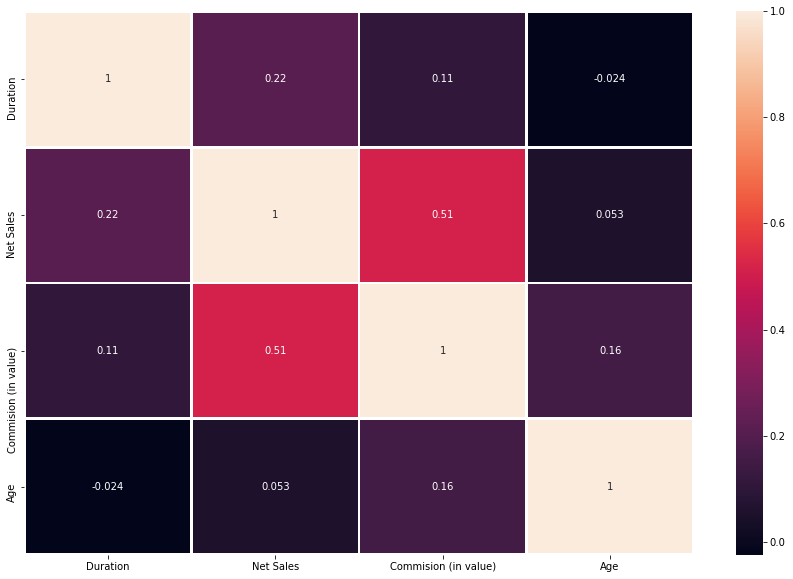

In [34]:
plt.figure(figsize=(15,10))
sns.heatmap(df2.corr(), annot=True, linecolor='white', linewidths=2)

As expected, we see some positive correlation between the Net Sales and Commission earned

## Lets preprocess the data so it is ready to use in our models 

In [35]:
df3 = df2.copy()

In [36]:
destination_engineering = pd.pivot_table(data=df3, index='Destination', 
               values='Duration', aggfunc='count').sort_values(by='Duration', ascending = False)

In [37]:
destination_engineering = pd.DataFrame(destination_engineering)

<AxesSubplot:ylabel='Count'>

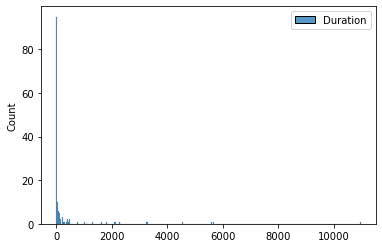

In [38]:
sns.histplot(destination_engineering)

In [39]:
destination_engineering = destination_engineering.reset_index()[:20]

In [40]:
top_20_dest = list(destination_engineering['Destination'].values)

As our destination variable had **149** unique values, we will reduce the cardinality as we perform one-hot-encoding by only classifying our destinations as those in our top 20, and the rest will be renamed to 'other'

In [41]:
df3['Destination'] = df3['Destination'].apply(lambda x: str(x) if str(x) in top_20_dest else 'Other')

In [42]:
df3['Destination'].describe(include='all')

count         57031
unique           21
top       SINGAPORE
freq          10967
Name: Destination, dtype: object

We now can perform one-hot-encoding

In [43]:
df3 = pd.get_dummies(df3, prefix_sep=' is ')

### Lets take a look at the correlations again

<AxesSubplot:>

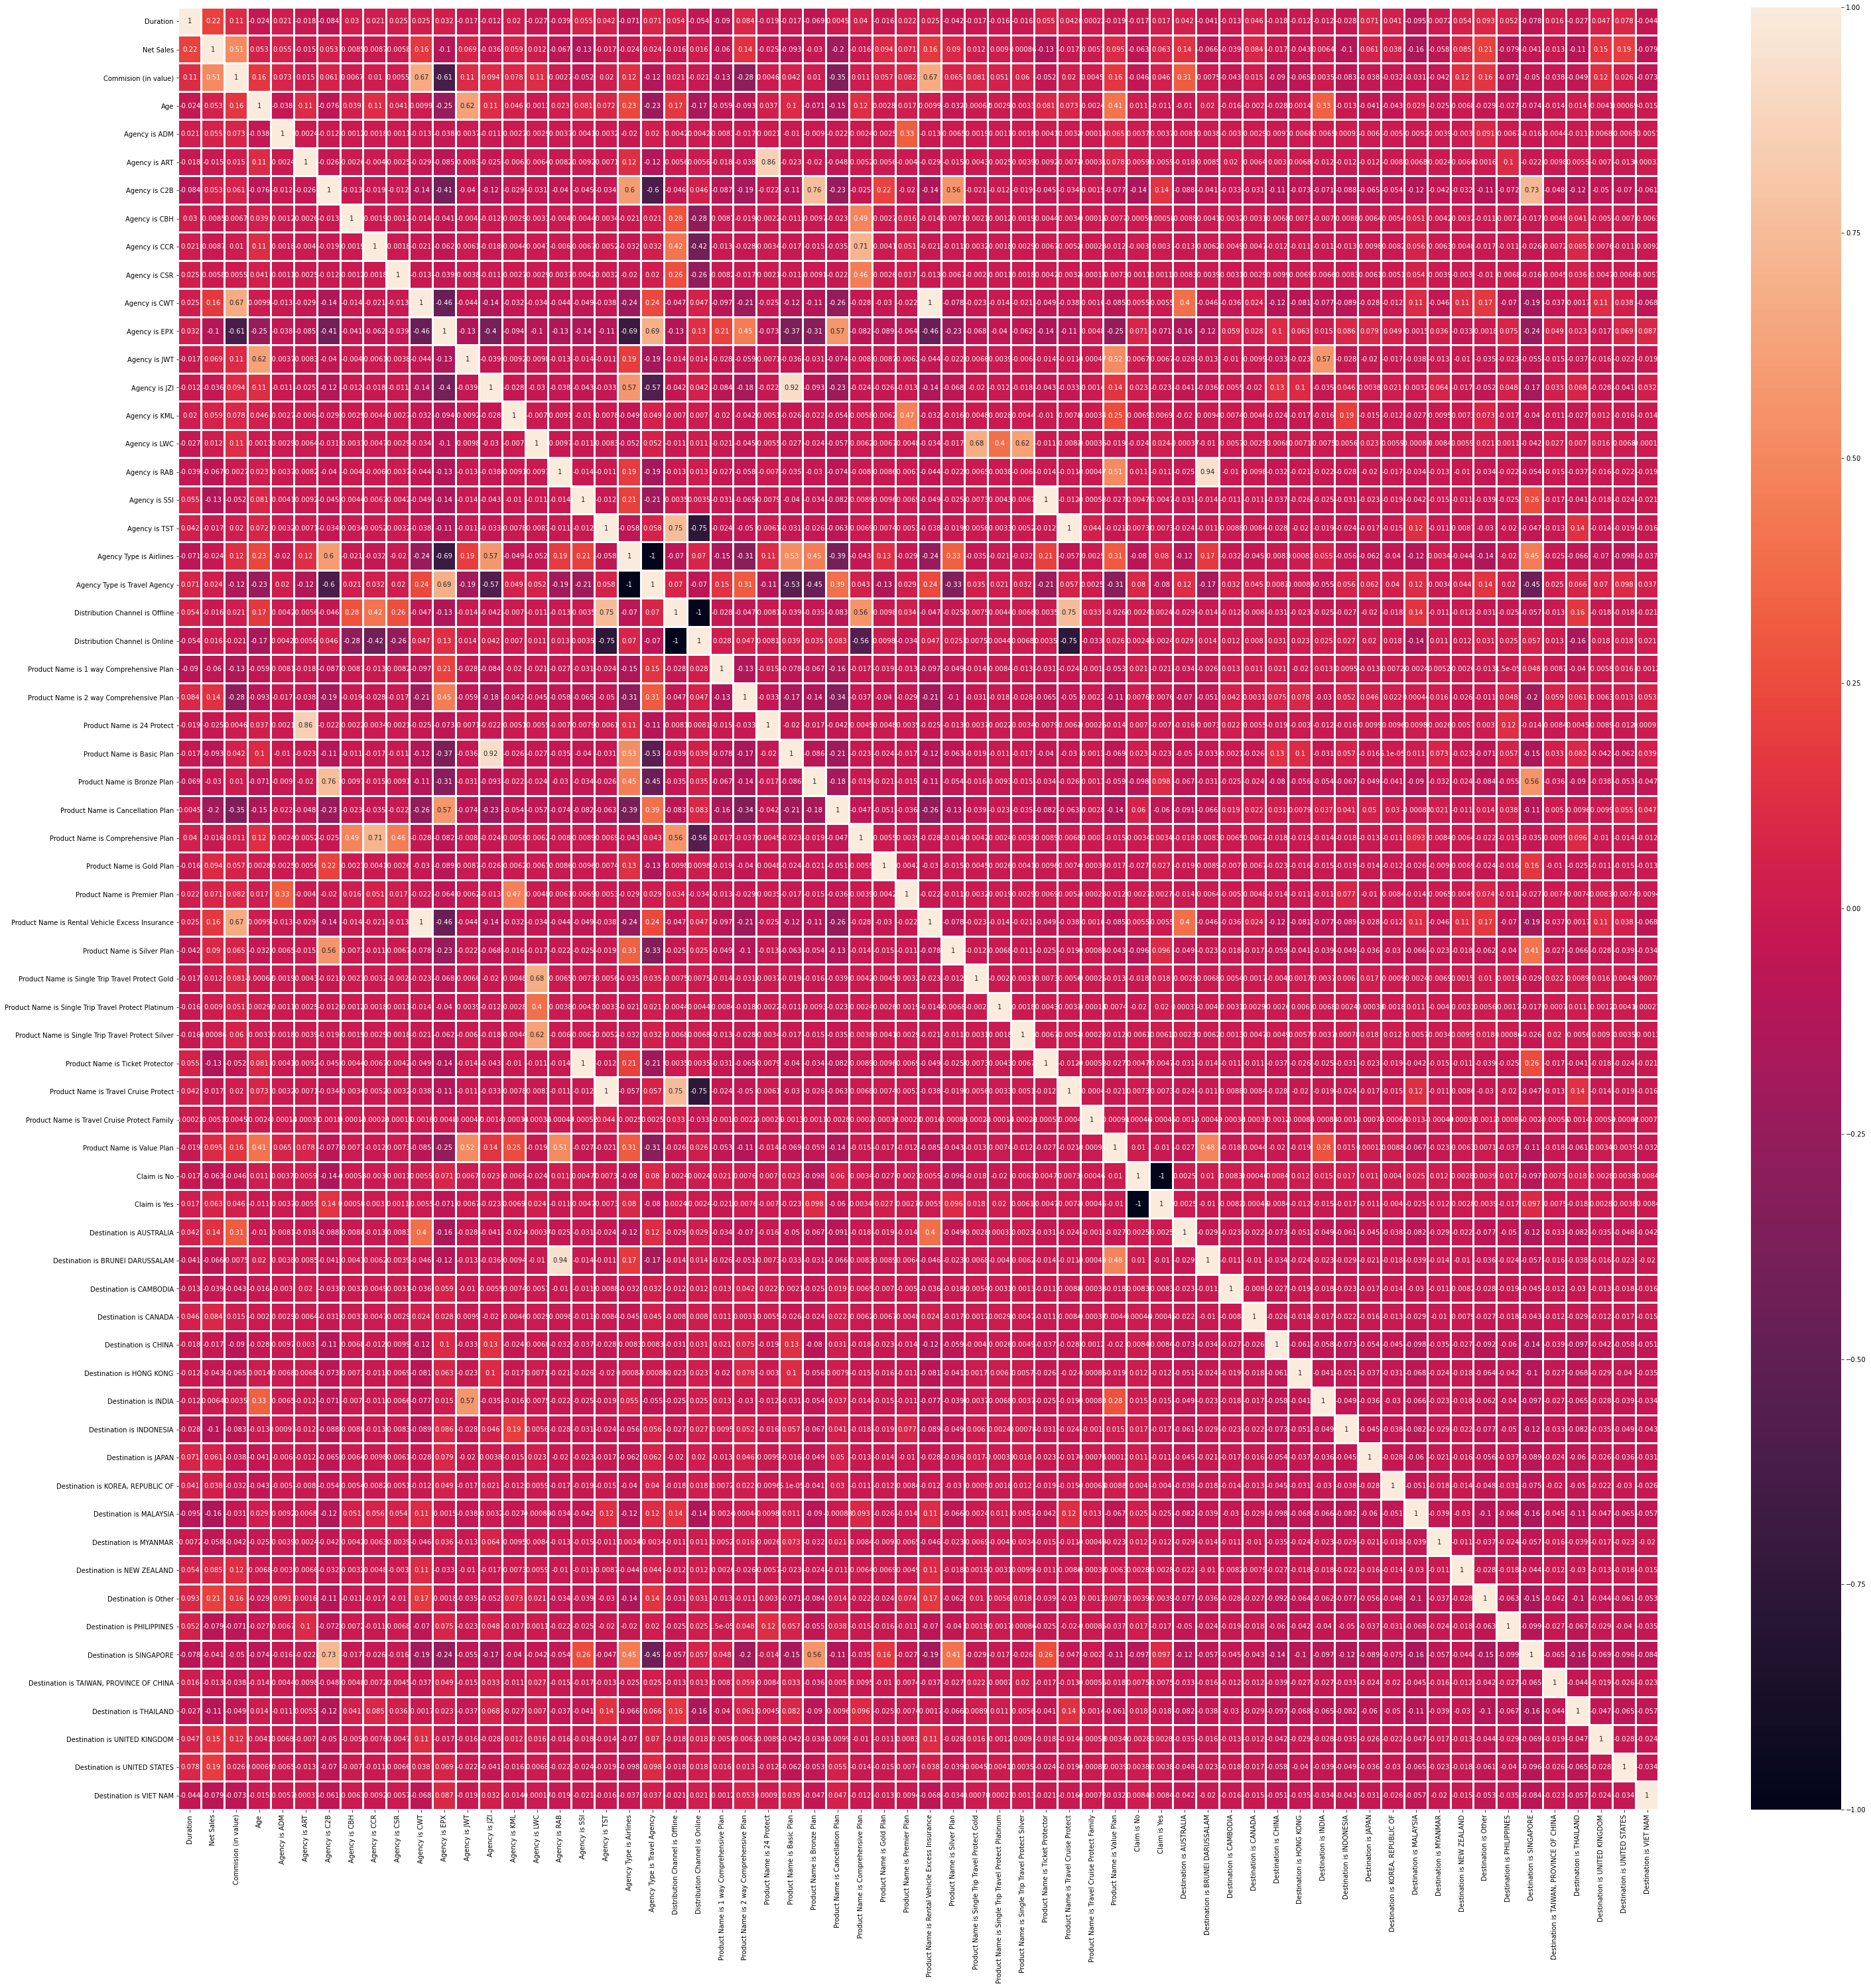

In [137]:
plt.figure(figsize=(50,50))
sns.heatmap(df3.corr(), annot=True, linecolor='white', linewidths=2)

Scale our data 

In [54]:
df4 = df3.copy()

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [56]:
#scaler = StandardScaler()
scaler = RobustScaler()
df4 = scaler.fit_transform(df4)

# Lets apply the models to perform unsupervised machine learning 

### K Means 



In [57]:
#kmeans_df = df2.copy()

In [58]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [59]:
X = df4.copy()

In [60]:
inertia = []
silhouettescore = []
for i in range(2,8):
    km = KMeans(n_clusters=i, random_state=1111)
    cluster_labels = km.fit_predict(X)
    score = silhouette_score(X, km.labels_)
    inertia.append(km.inertia_)
    silhouettescore.append(score)
    print('The inertia for clusters {}, is {}'.format(i,km.inertia_ ))
    print('The silhouette score for clusters {}, is {}'.format(i,score ))
    print('')

The inertia for clusters 2, is 449648.1779434839
The silhouette score for clusters 2, is 0.38684502425530776

The inertia for clusters 3, is 370804.1974953022
The silhouette score for clusters 3, is 0.36630841942420106

The inertia for clusters 4, is 314952.5092391737
The silhouette score for clusters 4, is 0.26388630935159024

The inertia for clusters 5, is 277527.78240438906
The silhouette score for clusters 5, is 0.24408276491025865

The inertia for clusters 6, is 252031.9734681049
The silhouette score for clusters 6, is 0.23302035269226373

The inertia for clusters 7, is 233368.1078255651
The silhouette score for clusters 7, is 0.246196490243243



Text(0.5, 1.0, 'Elbow Method to find optimal number of clusters')

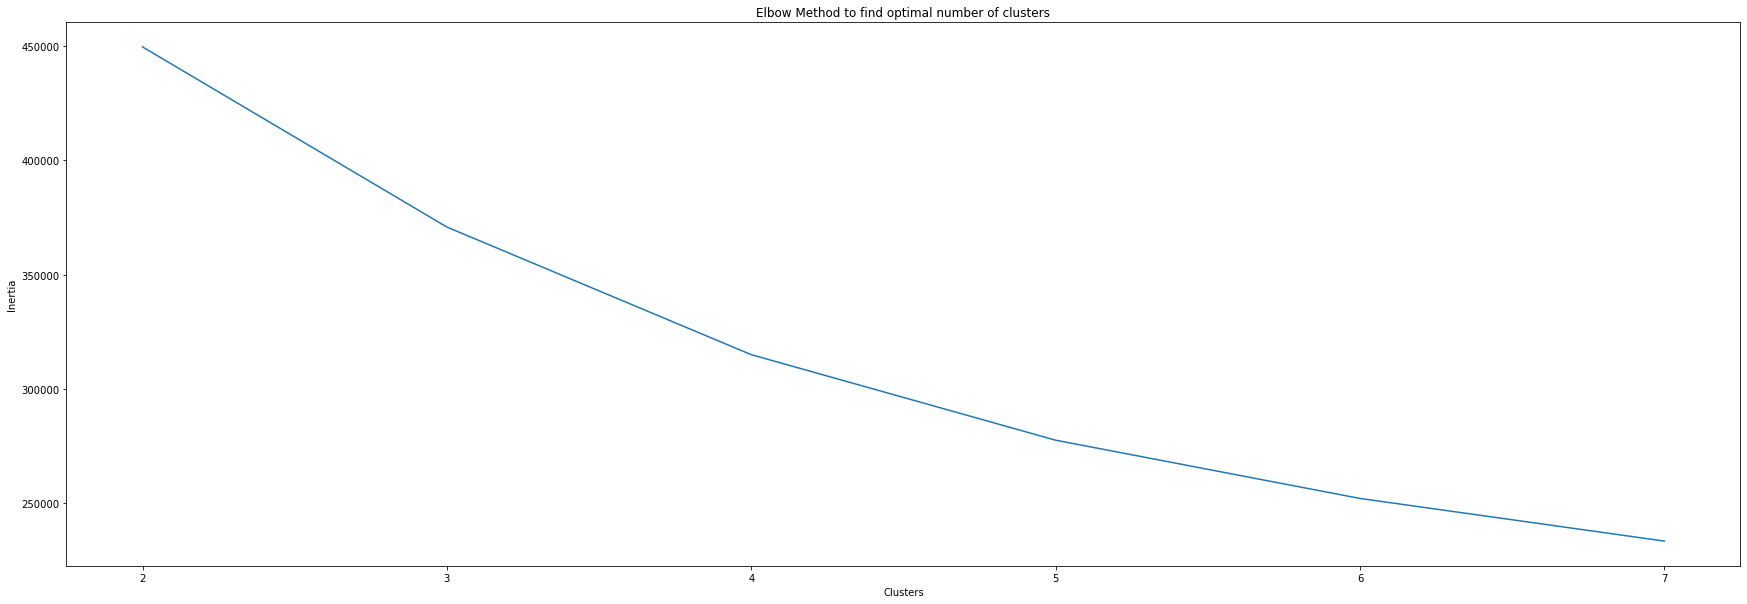

In [62]:
plt.figure(figsize=(30,10))
sns.lineplot(x=list(range(2,8)), y=inertia)
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method to find optimal number of clusters')

Text(0.5, 1.0, 'Silhouette Score to find optimal number of clusters')

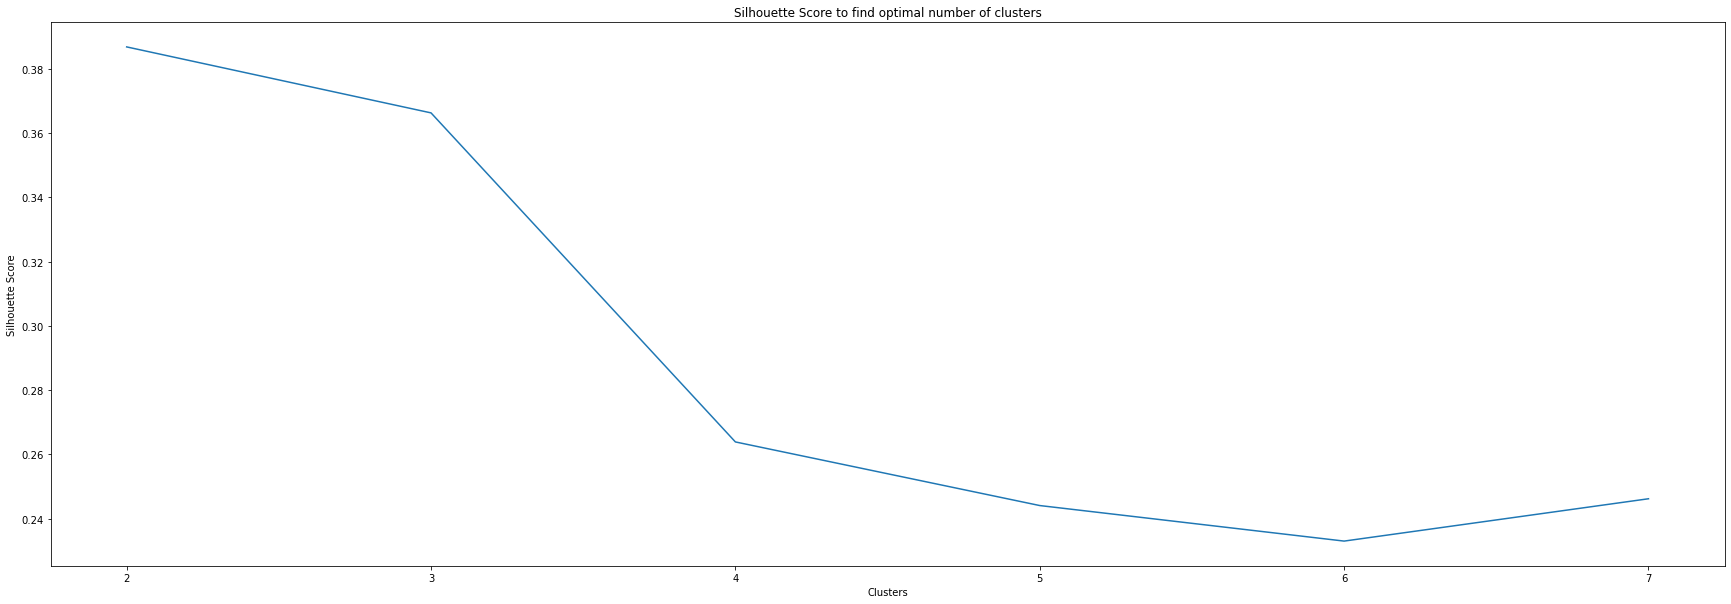

In [64]:
plt.figure(figsize=(30,10))
sns.lineplot(x=list(range(2,8)), y=silhouettescore)
plt.xlabel('Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score to find optimal number of clusters')

The inertia seems to decrease less between clusters 2 - 3

## Perhaps we can reduce the inertia with PCA 

In [65]:
X_pca = df4.copy()

In [66]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [78]:
n_components = X_pca.shape[1]

# Running PCA with all components
pca = PCA(n_components=n_components, random_state = 1111)
X_pca_1 = pca.fit(X_pca).transform(X_pca)


# Calculating the 95% Variance
total_variance = sum(pca.explained_variance_)
print("Total Variance in our dataset is: {}".format(total_variance))
var_95 = total_variance * 0.95
print("The 95% variance we want to have is: {}".format(var_95))
print("")
var_75 = total_variance * 0.75
print("The 75% variance we want to have is: {}".format(var_75))
print("")


Total Variance in our dataset is: 10.11451401258108
The 95% variance we want to have is: 9.608788311952026

The 75% variance we want to have is: 7.58588550943581



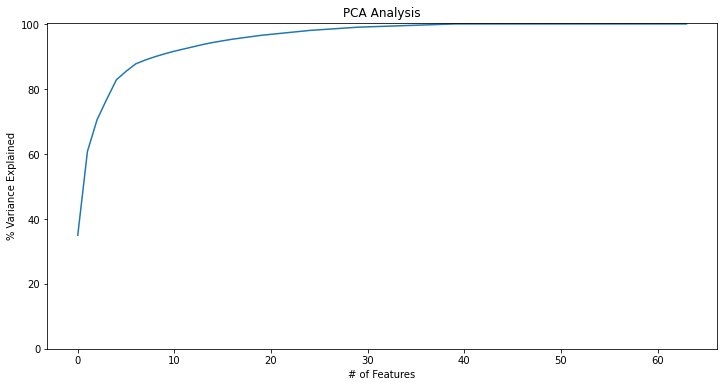

In [68]:
variance = pca.explained_variance_ratio_ 
var=np.cumsum(np.round(variance, 3)*100)
plt.figure(figsize=(12,6))
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(0,100.5)
plt.plot(var)

In [58]:
# Creating a df with the components and explained variance
pca_data = zip(range(0,n_components), pca.explained_variance_)
pca_data = pd.DataFrame(pca_data, columns=["PCA Component", "Explained Variance"])


print("Variance explain with 10 n_compononets: {}".format(sum(pca_data["Explained Variance"][0:10])))
print("Variance explain with 20 n_compononets: {}".format(sum(pca_data["Explained Variance"][0:20])))
print("Variance explain with 30 n_compononets: {}".format(sum(pca_data["Explained Variance"][0:30])))
print("Variance explain with 37 n_compononets: {}".format(sum(pca_data["Explained Variance"][0:37])))
print("Variance explain with 38 n_compononets: {}".format(sum(pca_data["Explained Variance"][0:38])))
print("Variance explain with 39 n_compononets: {}".format(sum(pca_data["Explained Variance"][0:39])))
print("Variance explain with 40 n_compononets: {}".format(sum(pca_data["Explained Variance"][0:40])))
print("Variance explain with 41 n_compononets: {}".format(sum(pca_data["Explained Variance"][0:41])))

Variance explain with 10 n_compononets: 9.179585561412733
Variance explain with 20 n_compononets: 9.749894958316569
Variance explain with 30 n_compononets: 10.005753766530988
Variance explain with 37 n_compononets: 10.079009519543938
Variance explain with 38 n_compononets: 10.086661953955932
Variance explain with 39 n_compononets: 10.09411451557212
Variance explain with 40 n_compononets: 10.100046787569626
Variance explain with 41 n_compononets: 10.103156632083394


20 Components seem to give us the desired explained variance of 95%

In [71]:
# Creating a df with the components and explained variance
pca_data = zip(range(0,n_components), pca.explained_variance_)
pca_data = pd.DataFrame(pca_data, columns=["PCA Component", "Explained Variance"])

print("Variance explain with 3 n_compononets: {}".format(sum(pca_data["Explained Variance"][0:3])))
print("Variance explain with 4 n_compononets: {}".format(sum(pca_data["Explained Variance"][0:4])))
print("Variance explain with 5 n_compononets: {}".format(sum(pca_data["Explained Variance"][0:5])))
print("Variance explain with 6 n_compononets: {}".format(sum(pca_data["Explained Variance"][0:6])))
print("Variance explain with 7 n_compononets: {}".format(sum(pca_data["Explained Variance"][0:7])))
print("Variance explain with 8 n_compononets: {}".format(sum(pca_data["Explained Variance"][0:8])))
print("Variance explain with 9 n_compononets: {}".format(sum(pca_data["Explained Variance"][0:9])))
print("Variance explain with 10 n_compononets: {}".format(sum(pca_data["Explained Variance"][0:10])))


Variance explain with 3 n_compononets: 7.1357515007678805
Variance explain with 4 n_compononets: 7.776656414242897
Variance explain with 5 n_compononets: 8.380115531488821
Variance explain with 6 n_compononets: 8.641005846941987
Variance explain with 7 n_compononets: 8.873405953222132
Variance explain with 8 n_compononets: 8.991770097508082
Variance explain with 9 n_compononets: 9.08937061881498
Variance explain with 10 n_compononets: 9.179585561412733


4 Components seem to give us the desired explained variance of 75%

We will recalculate our inertia values to determine the best cluster numeber after running PCA with 4 components 

In [79]:
pca = PCA(n_components=4, random_state = 1111)
X_pca_2 = pca.fit(X).transform(X)

I have chosen to use a smaller cluster range to iterate over and find a silhouette score for, as I am already aware of a cluster number of 2 - 3 being optimal as seen earlier

In [80]:
inertia = []
silhouettescore = []
for i in range(2,4):
    km = KMeans(n_clusters=i, random_state=1111)
    cluster_labels = km.fit_predict(X_pca_2)
    score = silhouette_score(X_pca_2, km.labels_)
    inertia.append(km.inertia_)
    silhouettescore.append(score)
    print('The inertia for clusters {}, is {}'.format(i,km.inertia_ ))
    print('The silhouette score for clusters {}, is {}'.format(i,score ))
    print('')

The inertia for clusters 2, is 316381.79718629894
The silhouette score for clusters 2, is 0.4875651168365311

The inertia for clusters 3, is 237892.2816107316
The silhouette score for clusters 3, is 0.4796615834354658



In [81]:
#Ill take 2 clusters 

In [87]:
km = KMeans(n_clusters=2, random_state=1111)
cluster_labels = km.fit_predict(X_pca_2)

In [88]:
kmeans_df = df2.copy()

In [89]:
kmeans_df['Clusters'] = cluster_labels

In [167]:
kmeans_df.head(1)

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age,Clusters
21,C2B,Airlines,Online,Bronze Plan,No,12,SINGAPORE,46.15,11.54,44,0


In [169]:
kmeans_df.to_csv('Kmeans_output.csv', index=False)

<AxesSubplot:xlabel='Agency Type', ylabel='count'>

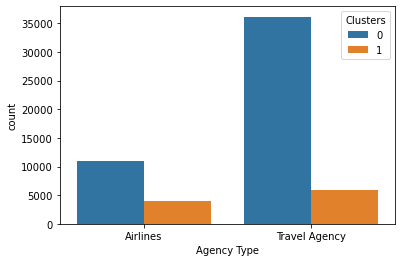

In [91]:
sns.countplot(data=kmeans_df, x='Agency Type', hue='Clusters')

<AxesSubplot:xlabel='Age', ylabel='Net Sales'>

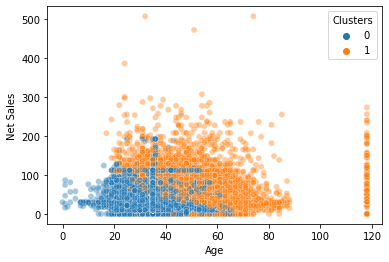

In [92]:
sns.scatterplot(data=kmeans_df, x='Age', y='Net Sales' ,hue='Clusters', alpha=0.4)

<AxesSubplot:xlabel='Age', ylabel='Commision (in value)'>

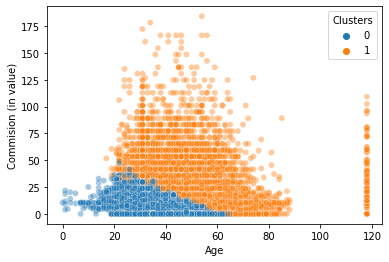

In [97]:
sns.scatterplot(data=kmeans_df, x='Age', y='Commision (in value)' ,hue='Clusters', alpha=0.4)

<AxesSubplot:xlabel='Clusters', ylabel='Net Sales'>

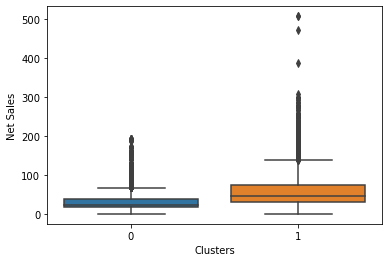

In [93]:
sns.boxplot(data = kmeans_df, y = 'Net Sales', x='Clusters' )

<AxesSubplot:xlabel='Clusters', ylabel='Age'>

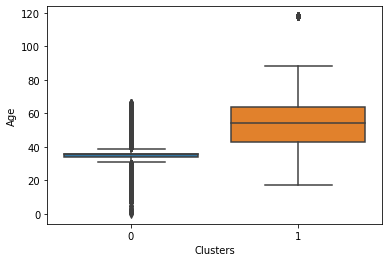

In [94]:
sns.boxplot(data = kmeans_df, y = 'Age', x='Clusters' )

<AxesSubplot:xlabel='Clusters', ylabel='Duration'>

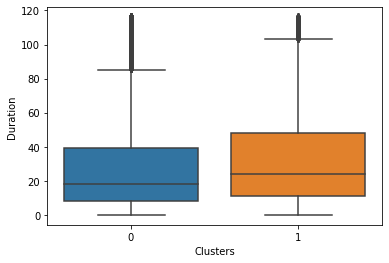

In [95]:
sns.boxplot(data = kmeans_df, y = 'Duration', x='Clusters' )

<AxesSubplot:xlabel='Distribution Channel', ylabel='count'>

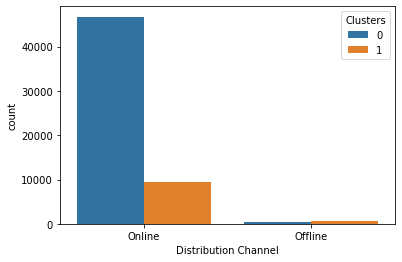

In [96]:
sns.countplot(data=kmeans_df, x='Distribution Channel', hue='Clusters')

<AxesSubplot:xlabel='Claim', ylabel='count'>

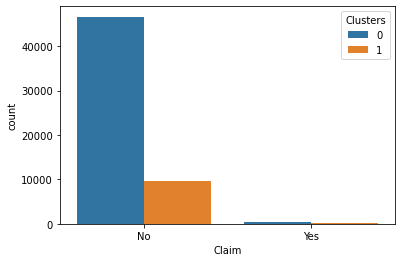

In [166]:
sns.countplot(data=kmeans_df, x='Claim', hue='Clusters')

<AxesSubplot:xlabel='Clusters', ylabel='Duration'>

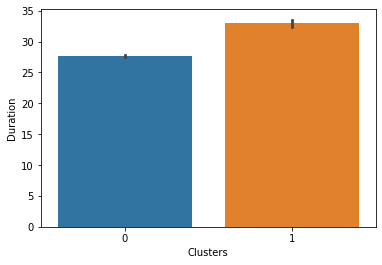

In [100]:
sns.barplot(data=kmeans_df, y='Duration', x='Clusters')

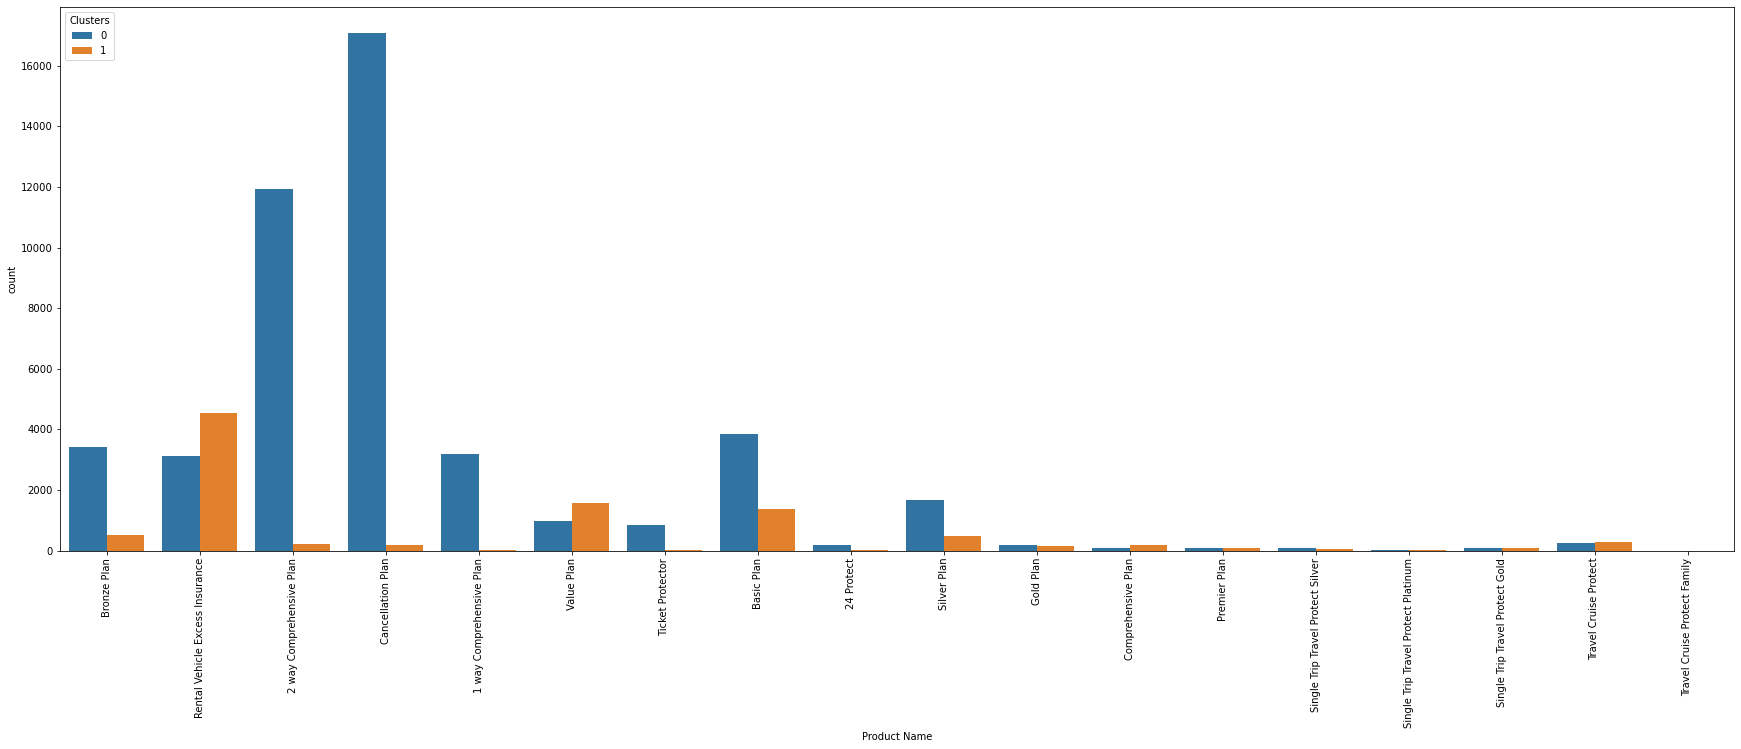

In [109]:
plt.figure(figsize = (30,10))
sns.countplot(data=kmeans_df, x='Product Name', hue='Clusters')
plt.xticks(rotation=90)
plt.show()

In [136]:
top10_dest = pd.pivot_table(data=kmeans_df, index= 'Destination', values='Age',aggfunc='count', columns='Clusters').reset_index()
top10_dest = top10_dest.fillna(0)


In [153]:
top10_dest['Total Count'] = top10_dest[0] + top10_dest[1]
top10_dest = top10_dest.sort_values(by = 'Total Count', ascending = False)[:10]
top10_dest

Clusters,Destination,0,1,Total Count
115,SINGAPORE,9760.0,1207.0,10967.0
77,MALAYSIA,4704.0,973.0,5677.0
126,THAILAND,4726.0,885.0,5611.0
25,CHINA,4131.0,434.0,4565.0
56,INDONESIA,3124.0,181.0,3305.0
3,AUSTRALIA,1556.0,1721.0,3277.0
52,HONG KONG,2044.0,260.0,2304.0
100,PHILIPPINES,2149.0,121.0,2270.0
55,INDIA,1389.0,764.0,2153.0
137,UNITED STATES,1597.0,509.0,2106.0


In [154]:
top10_dest['Destination'].unique()

array(['SINGAPORE', 'MALAYSIA', 'THAILAND', 'CHINA', 'INDONESIA',
       'AUSTRALIA', 'HONG KONG', 'PHILIPPINES', 'INDIA', 'UNITED STATES'],
      dtype=object)

In [160]:
top10list = ['SINGAPORE', 'MALAYSIA', 'THAILAND', 'CHINA', 'INDONESIA',
       'AUSTRALIA', 'HONG KONG', 'PHILIPPINES', 'INDIA', 'UNITED STATES']
top10_dest = kmeans_df.loc[kmeans_df['Destination'].isin(top10list)]

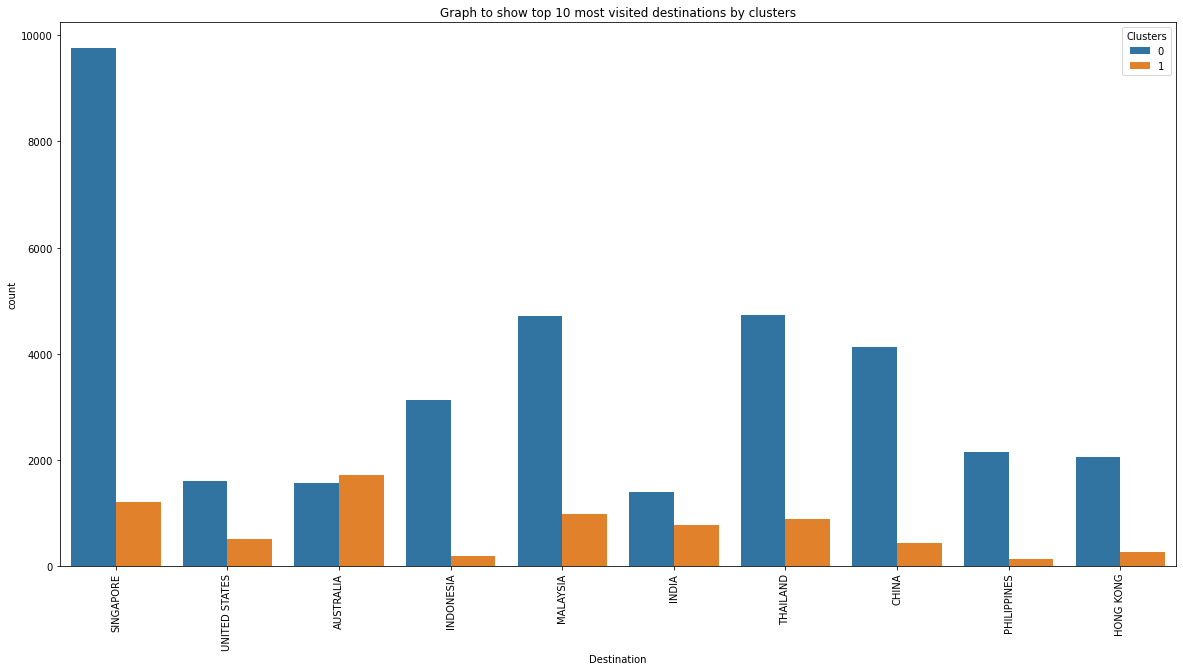

In [165]:
plt.figure(figsize = (20,10))
sns.countplot(data=top10_dest,hue='Clusters', x= 'Destination')
plt.xticks(rotation=90)
plt.title('Graph to show top 10 most visited destinations by clusters')
plt.show()
